In [1]:
import pandas as pd
import emoji
import regex as re
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from deep_translator import GoogleTranslator


import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sabrina/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sabrina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
data = pd.read_csv('scrape/restaurant-data/cleaned_restaurant_reviews.csv', index_col=0)

## LDA

In [5]:
data = data.reset_index(drop=True)

In [12]:
cleaned_df.head(3)

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Korean,Healthy,Rainy Day Comforts,Drinks,Good Environment,European,Alcohol,Western,Recommended,region
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,0,0,0,East
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,0,0,0,East
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,0,0,0,East


In [13]:
import gensim

In [14]:
# create dictionary
docs = cleaned_df['cleaned_text']
processed_docs = [d.split() for d in docs]
dictionary = gensim.corpora.Dictionary(processed_docs)

In [15]:
# term document frequency
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [16]:
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                       id2word=dictionary,
                                       num_topics=10,
                                       random_state =100)

In [17]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[bow_corpus]

[(0,
  '0.012*"dish" + 0.010*"cream" + 0.008*"good" + 0.007*"like" + 0.006*"taste" '
  '+ 0.006*"food" + 0.004*"sweet" + 0.004*"ice" + 0.004*"try" + 0.004*"pasta"'),
 (1,
  '0.007*"taste" + 0.007*"food" + 0.007*"good" + 0.006*"fry" + 0.005*"like" + '
  '0.005*"serve" + 0.005*"cheese" + 0.005*"flavour" + 0.005*"try" + '
  '0.005*"dish"'),
 (2,
  '0.010*"good" + 0.007*"sauce" + 0.007*"rice" + 0.006*"taste" + 0.006*"try" + '
  '0.006*"pork" + 0.006*"flavour" + 0.005*"chicken" + 0.005*"prawn" + '
  '0.005*"fry"'),
 (3,
  '0.007*"flavour" + 0.007*"fry" + 0.006*"cake" + 0.006*"good" + 0.006*"sweet" '
  '+ 0.006*"dish" + 0.006*"like" + 0.005*"taste" + 0.004*"egg" + 0.004*"tart"'),
 (4,
  '0.009*"good" + 0.008*"taste" + 0.007*"like" + 0.005*"pork" + 0.005*"sweet" '
  '+ 0.005*"noodle" + 0.004*"meat" + 0.004*"set" + 0.004*"chicken" + '
  '0.004*"love"'),
 (5,
  '0.008*"sweet" + 0.008*"chicken" + 0.007*"food" + 0.005*"like" + '
  '0.005*"nice" + 0.005*"pork" + 0.005*"taste" + 0.005*"good" + '
  

In [18]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
lda_score = coherence_model_lda.get_coherence()
lda_score

0.3329824638559312

In [19]:
def compute_coherence_values(k):
    
    lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=k,
                                           random_state =100)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [20]:
compute_coherence_values(10)

0.3320531365117204

In [21]:
# iterate through number of topics
coherence_values = []
topics_range = range(2,11,1)
for k in topics_range:
    value = compute_coherence_values(k)
    print(k)
    print(value)
    coherence_values.append(value)

2
0.34256172361632586
3
0.3512378095998454
4
0.3509822351691631
5
0.3385493455937959
6
0.3338885797459299


Process SpawnPoolWorker-100:
Process SpawnPoolWorker-102:
Process SpawnPoolWorker-101:
Process SpawnPoolWorker-99:
Traceback (most recent call last):
  File "/Users/sabrina/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/sabrina/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/sabrina/opt/anaconda3/lib/python3.9/multiprocessing/pool.py", line 109, in worker
    initializer(*initargs)
  File "/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/gensim/models/ldamulticore.py", line 341, in worker_e_step
    chunk_no, chunk, w_state = input_queue.get()
  File "/Users/sabrina/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 102, in get
    with self._rlock:
  File "/Users/sabrina/opt/anaconda3/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
Traceback (most recent call la

KeyboardInterrupt: 

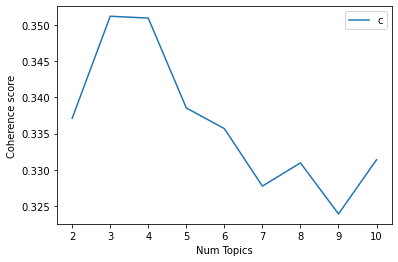

In [ ]:
import matplotlib.pyplot as plt

# Show graph
plt.plot(topics_range, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
from pprint import pprint
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state = 100)
# Print the Keyword in the 3 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[bow_corpus]

[(0,
  '0.008*"dish" + 0.007*"good" + 0.006*"like" + 0.006*"taste" + 0.006*"cream" '
  '+ 0.005*"sweet" + 0.005*"food" + 0.005*"flavour" + 0.004*"pork" + '
  '0.004*"sauce"'),
 (1,
  '0.007*"taste" + 0.006*"good" + 0.006*"like" + 0.006*"flavour" + 0.005*"fry" '
  '+ 0.005*"food" + 0.005*"cheese" + 0.005*"sweet" + 0.004*"chicken" + '
  '0.004*"serve"'),
 (2,
  '0.008*"good" + 0.007*"sauce" + 0.006*"flavour" + 0.006*"taste" + '
  '0.006*"pork" + 0.006*"rice" + 0.005*"try" + 0.005*"chicken" + 0.005*"sweet" '
  '+ 0.005*"like"')]


In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/sab

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.005221  0.010054       1        1  38.799264
0     -0.006620 -0.009293       2        1  35.383165
1      0.011841 -0.000762       3        1  25.817571, topic_info=        Term         Freq        Total Category  logprob  loglift
168     dish  6943.000000  6943.000000  Default  30.0000  30.0000
866   cheese  4106.000000  4106.000000  Default  29.0000  29.0000
831    cream  4419.000000  4419.000000  Default  28.0000  28.0000
1049     set  2770.000000  2770.000000  Default  27.0000  27.0000
226     food  5351.000000  5351.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
6       cake   805.656804  2994.658933   Topic3  -5.9964   0.0412
74     quite   799.177468  3544.463611   Topic3  -6.0045  -0.1354
415    place   784.378825  3254.786141   Topic3  -6.0231  -0.0689
323     nice   755.883471  3064.571583   Topic3  -6.0602  -0.0457
666     rice   766.691739  4990.557989   Topic3  -6.0460  -0.5191

[304 rows x 6 columns], token_table=       Topic      Freq                     Term
term                                           
2667       1  0.849743                     1340
2667       2  0.212436                     1340
4659       1  0.834366  1smiling_face_with_halo
1088       1  0.884219                   26nett
4599       1  0.861831                      5ea
...      ...       ...                      ...
21244      1  0.137190                 zoidberg
21244      2  0.137190                 zoidberg
21244      3  0.685951                 zoidberg
17657      3  0.858211                    zucca
40596      3  0.666545                      老婆餅

[544 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])